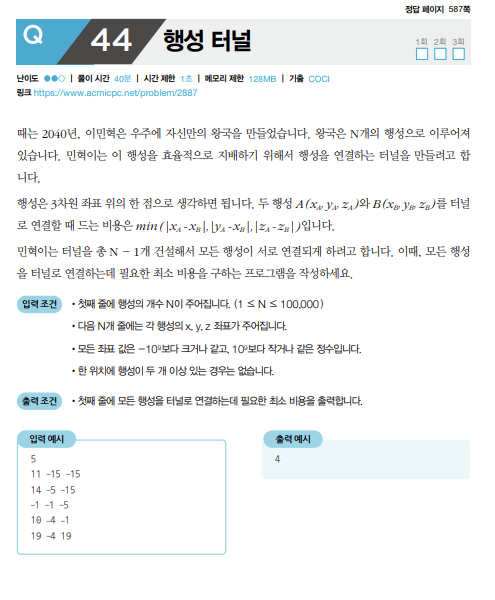

## 답안 ver

In [1]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]
 
# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b
 
# 노드의 개수 입력받기
n = int(input())
parent = [0] * (n + 1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와, 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, n + 1):
    parent[i] = i

x = []
y = []
z = []

# 모든 노드에 대한 좌표 값 입력받기
for i in range(1, n + 1):
    data = list(map(int, input().split()))
    x.append((data[0], i))
    y.append((data[1], i))
    z.append((data[2], i))

x.sort()
y.sort()
z.sort()

# 인접한 노드들로부터 간선 정보를 추출하여 처리
for i in range(n - 1):
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((x[i + 1][0] - x[i][0], x[i][1], x[i + 1][1]))
    edges.append((y[i + 1][0] - y[i][0], y[i][1], y[i + 1][1]))
    edges.append((z[i + 1][0] - z[i][0], z[i][1], z[i + 1][1]))

# 간선을 비용순으로 정렬
edges.sort()

# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost

print(result)

5
11 -15 -15
14 -5 -15
-1 -1 -5
10 -4 -1
19 -4 19
4
